# Adding Lense-Thirring (LT) effect

In [1]:
import rebound
sim = rebound.Simulation()
sim.add(m=1., hash="star") # Sun
sim.add(m=1.e-5,a=1,e=1.e-2, hash="planet")
sim.move_to_com() # Moves to the center of momentum frame
ps = sim.particles
sim.integrate(1.)
print("pomega = %.16f"%sim.particles[1].pomega)

pomega = 0.0000000000000000


As expected, the pericenter did not move at all.  Now let's add rotation to star

In [2]:
import reboundx
rebx = reboundx.Extras(sim)
lt = rebx.load_force("lense_thirring")
rebx.add_force(lt)

The GR effects need you to set the speed of light in the right units. The constants module has a set of constants in REBOUND's default units of AU, solar masses and yr/ 2𝜋
  (such that G=1). If you want to use other units, you'd need to calculate c.

In [3]:
from reboundx import constants
lt.params["lt_c"] = constants.C

In [4]:
ps["star"].params["lt_rot_rate"] =  9000.0 #solar rotation rate in rad/year
ps["star"].params["lt_Mom_I_fac"] = 0.07; #solar moment of inertia prefactor
ps["star"].params["lt_R_eq"] = 1/200; #solar equatorial radius in AU
ps["star"].params["lt_p_hatx"] = 0.0
ps["star"].params["lt_p_haty"] = 0.0
ps["star"].params["lt_p_hatz"] = 1.0

Now we integrate as normal:

In [5]:
import numpy as np
tmax = 1.e4
Nout = 1000
times = np.logspace(0, np.log10(tmax), Nout)
pomegas = np.zeros(Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    pomegas[i] = ps["planet"].pomega
print("pomega = {0}".format(ps[1].pomega))

pomega = -6.188432688925133e-06


And we plot the calculated precession rate. 
Note that this is a small effect, about 7% of the solar oblateness precession rate for Mercury

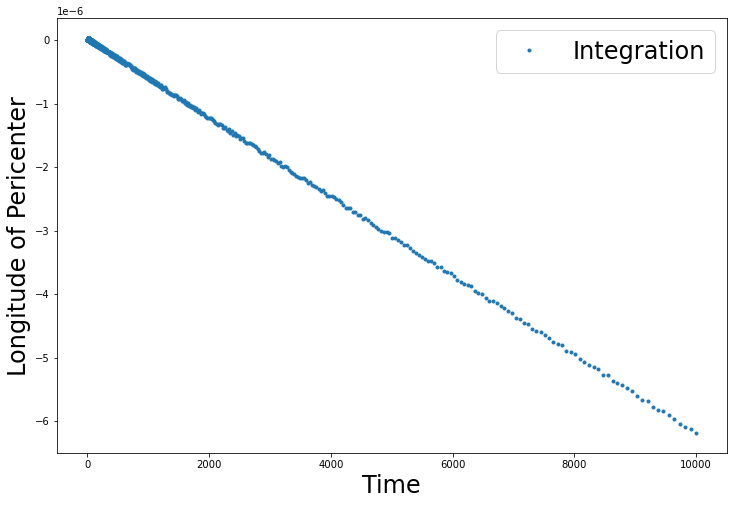

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(times, pomegas, '.', label='Integration')
ax.set_xlabel('Time', fontsize=24)
ax.set_ylabel('Longitude of Pericenter', fontsize=24)
ax.legend(fontsize=24)